In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/sidparmar/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/sidparmar/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

Decoding reviews back to English

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(val, key) for (key, val) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

#### Encoding the integer sequences into a binary matrix - one hot encoding - naive approach 

In [7]:
def vectorize_sequence(seq, dimention=10000):
    res = np.zeros((len(seq), dimention))
    
    for i, seq in enumerate(seq):
        res[i, seq] = 1.
        
    return res

In [8]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing labels

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building a model

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [13]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

###### create a validation set

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

training

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5918 - accuracy: 0.7144 - val_loss: 0.3940 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3265 - accuracy: 0.9022 - val_loss: 0.3204 - val_accuracy: 0.8738
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2294 - accuracy: 0.9248 - val_loss: 0.2761 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1758 - accuracy: 0.9425 - val_loss: 0.2833 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1484 - accuracy: 0.9530 - val_loss: 0.2788 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1155 - accuracy: 0.9641 - val_loss: 0.2915 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0929 - accuracy: 0.9748 - val_loss: 0.3072 - val_accuracy: 0.8838
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training and validation loss

In [17]:
import matplotlib.pyplot as plt

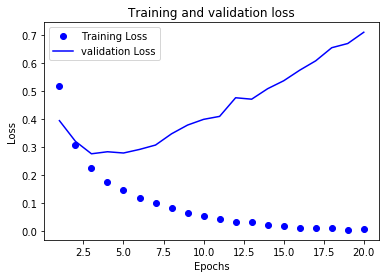

In [18]:
loss_vals = history_dict["loss"]
validation_loss_vals = history_dict["val_loss"]
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_vals, 'bo', label="Training Loss")
plt.plot(epochs, validation_loss_vals, 'b', label="validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plotting training and validation accuracy

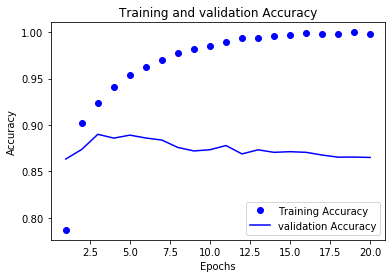

In [19]:
plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model we used is overfitting the data as you can see from the graphs.

Let's create a new model with 4 epochs from scratch.

In [20]:
tf.keras.backend.clear_session()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [22]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.5428 - accuracy: 0.7596
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2821 - accuracy: 0.9034
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2047 - accuracy: 0.9307
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2890 - accuracy: 0.8849


In [24]:
results

[0.2890305817127228, 0.884880006313324]

88% accuracy on test data.

In [25]:
def plot_val_loss(history_dict):
    loss_vals = history_dict["loss"]
    validation_loss_vals = history_dict["val_loss"]
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss_vals, 'bo', label="Training Loss")
    plt.plot(epochs, validation_loss_vals, 'b', label="validation Loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
def plot_accuracy(history_dict):
    
    loss_vals = history_dict["loss"]
    validation_loss_vals = history_dict["val_loss"]
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="validation Accuracy")
    plt.title("Training and validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    

### L1 and L2 regularization 

In [29]:
from tensorflow.keras import regularizers

In [34]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 1.5518 - accuracy: 0.6496 - val_loss: 0.7624 - val_accuracy: 0.8108
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.7328 - accuracy: 0.8179 - val_loss: 0.7056 - val_accuracy: 0.8114
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6765 - accuracy: 0.8305 - val_loss: 0.6750 - val_accuracy: 0.8154
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6359 - accuracy: 0.8445 - val_loss: 0.6351 - val_accuracy: 0.8375
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6078 - accuracy: 0.8578 - val_loss: 0.6023 - val_accuracy: 0.8606
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.5819 - accuracy: 0.8671 - val_loss: 0.5848 - val_accuracy: 0.8635
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5688 - accuracy: 0.8691 - val_loss: 0.5812 - val_accuracy: 0.8623
Epoch 8/20
30

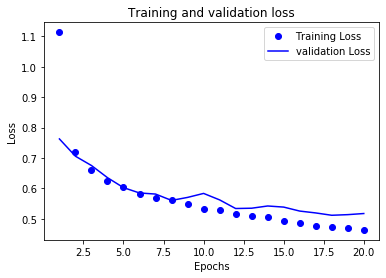

In [35]:
plot_val_loss(history.history)

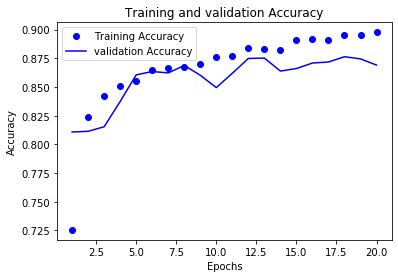

In [36]:
plot_accuracy(history.history)

Applying l1 and l2 loss functions improved validation accuracy and decreased loss. It is almost the same as training loss and accuracy.

The model is not overfitting as much as it was before.

### Adding Dropout layer

In [55]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6522 - accuracy: 0.6011 - val_loss: 0.4783 - val_accuracy: 0.8510
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4901 - accuracy: 0.7864 - val_loss: 0.3711 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4040 - accuracy: 0.8358 - val_loss: 0.3145 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3465 - accuracy: 0.8696 - val_loss: 0.2907 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2929 - accuracy: 0.8931 - val_loss: 0.2763 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2564 - accuracy: 0.9113 - val_loss: 0.2750 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2264 - accuracy: 0.9280 - val_loss: 0.2847 - val_accuracy: 0.8851
Epoch 8/20
30

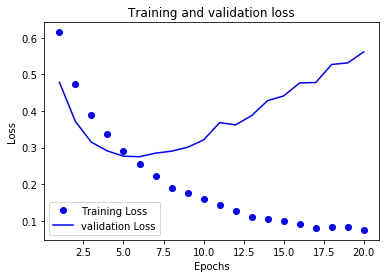

In [56]:
plot_val_loss(history.history)

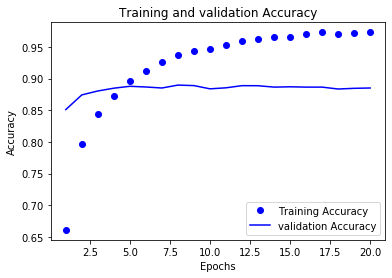

In [57]:
plot_accuracy(history.history)

Using dropout method on this model we were able to reduce overfitting a little. Validation loss is lower and validationaccuracy is a little higher than the original model.